# Coverage Guided Fuzzer

## SOEN 7481- Assignment 2

## Contributors

+ Prashanthi Ramesh - 40080517
+ Gagandeep Singh   - 40080644
+ Raghav Kaushal    - 40075268

### Smarter way to create fuzzed input for python program

#### Steps to create the fuzzer

1. We maintain a population (i.e., a list of seeds) that we use for mutation. Each seed in the population will be an input that provide additional coverage information.
2. We will take a seed from the population and fuzz the seed to test the program. If the population is empty, we mutate an initial seed that we provide manually.
3. We take the seed from the population semi-randomly, but the seeds that provided more additional coverage have a higher chance of being selected.
4. If the new input increased the coverage, we add this new input to the population as a new seed. We assign a score to the seed (i.e., how much coverage it improved).
5. We repeat and go back to Step 2 until we execute the fuzzer 100 times (i.e., your pre-defined number of trials).

#### Testing the fuzzer

+  We run our fuzzer on 3 Python programs
    - Differentiate network using Subnet
    - Credit Card Validation
    - RSA Encryption
    
+ Evaluate the programs on different fuzzing approaches:
    - Pure Randomly Fuzzing Approach
    - Semi Randomly Fuzzing Approach
    - Mutation Fuzzing Approach
    - Coverage Guided Fuzzing Approach- smarter way to create fuzzed input

+ We discuss and compare each fuzzing approach in terms of coverage.
+ We discuss how the coverage changes for the inputs that we tried.
+ We also record any bug found in our program.

## References

1. https://github.com/geekcomputers/Python


# Differentiate Network using Subnet

#### Description: 

+ This program calculates the network address, broadcast address, wildcard mask, number of host bits and number of hosts/subnet from the given IP address and subnet mask.

#### Input: The program takes 2 inputs- 

+ String- IP Address
+ String- Subnet mask

#### Output: 

+ Prints the calculated network address, broadcast address, wildcard mask, number of host bits and number of hosts/subnet.
+ If the given IP Address or Subnet mask is invalid, the program will end. 

#### Metrics:

+ SLOC- 69
+ Comments- 34
+ McCabe- 19

In [2]:
import random
import sys
def subnet_calc(ip_address, subnet_mask):

        #Checking IP address validity
    while True:

            #Checking octets            
        a = ip_address.split('.')

        if (len(a) == 4) and (1 <= int(a[0]) <= 223) and (int(a[0]) != 127) and (int(a[0]) != 169 or int(a[1]) != 254) and (0 <= int(a[1]) <= 255 and 0 <= int(a[2]) <= 255 and 0 <= int(a[3]) <= 255):
            break

        else:
            raise ValueError("Invalid IP Address")
            

    masks = [255, 254, 252, 248, 240, 224, 192, 128, 0]

        #Checking Subnet Mask validity
    while True:

            #Checking octets            
        b = subnet_mask.split('.')

        if (len(b) == 4) and (int(b[0]) == 255) and (int(b[1]) in masks) and (int(b[2]) in masks) and (int(b[3]) in masks) and (int(b[0]) >= int(b[1]) >= int(b[2]) >= int(b[3])):
            break

        else:
            raise ValueError("Invalid subnet Mask")

	############# Application #1 - Part #2 #############

        #Algorithm for subnet identification, based on IP and Subnet Mask

        #Convert mask to binary string
    mask_octets_padded = []
    mask_octets_decimal = subnet_mask.split(".")
        #print mask_octets_decimal

    for octet_index in range(0, len(mask_octets_decimal)):

            #print bin(int(mask_octets_decimal[octet_index]))

        binary_octet = bin(int(mask_octets_decimal[octet_index])).split("b")[1]
            #print binary_octet

        if len(binary_octet) == 8:
            mask_octets_padded.append(binary_octet)

        elif len(binary_octet) < 8:
            binary_octet_padded = binary_octet.zfill(8)
            mask_octets_padded.append(binary_octet_padded)

        #print mask_octets_padded

    decimal_mask = "".join(mask_octets_padded)
        #print decimal_mask   #Example: for 255.255.255.0 => 11111111111111111111111100000000

        #Counting host bits in the mask and calculating number of hosts/subnet
    no_of_zeros = decimal_mask.count("0")
    no_of_ones = 32 - no_of_zeros
    no_of_hosts = abs(2 ** no_of_zeros - 2) #return positive value for mask /32

        #print no_of_zeros
        #print no_of_ones
        #print no_of_hosts

        #Obtaining wildcard mask
    wildcard_octets = []
    for w_octet in mask_octets_decimal:
        wild_octet = 255 - int(w_octet)
        wildcard_octets.append(str(wild_octet))

        #print wildcard_octets

    wildcard_mask = ".".join(wildcard_octets)
        #print wildcard_mask

        ############# Application #1 - Part #3 #############

        #Convert IP to binary string
    ip_octets_padded = []
    ip_octets_decimal = ip_address.split(".")

    for octet_index in range(0, len(ip_octets_decimal)):

        binary_octet = bin(int(ip_octets_decimal[octet_index])).split("b")[1]

        if len(binary_octet) < 8:
            binary_octet_padded = binary_octet.zfill(8)
            ip_octets_padded.append(binary_octet_padded)

        else:
            ip_octets_padded.append(binary_octet)

        #print ip_octets_padded

    binary_ip = "".join(ip_octets_padded)

        #print binary_ip   #Example: for 192.168.2.100 => 11000000101010000000001001100100

        #Obtain the network address and broadcast address from the binary strings obtained above

    network_address_binary = binary_ip[:(no_of_ones)] + "0" * no_of_zeros
        #print network_address_binary

    broadcast_address_binary = binary_ip[:(no_of_ones)] + "1" * no_of_zeros
        #print broadcast_address_binary

    net_ip_octets = []
    for octet in range(0, len(network_address_binary), 8):
        net_ip_octet = network_address_binary[octet:octet+8]
        net_ip_octets.append(net_ip_octet)

        #print net_ip_octets

    net_ip_address = []
    for each_octet in net_ip_octets:
        net_ip_address.append(str(int(each_octet, 2)))

        #print net_ip_address

    network_address = ".".join(net_ip_address)
        #print network_address

    bst_ip_octets = []
    for octet in range(0, len(broadcast_address_binary), 8):
        bst_ip_octet = broadcast_address_binary[octet:octet+8]
        bst_ip_octets.append(bst_ip_octet)

        #print bst_ip_octets

    bst_ip_address = []
    for each_octet in bst_ip_octets:
        bst_ip_address.append(str(int(each_octet, 2)))

        #print bst_ip_address

    broadcast_address = ".".join(bst_ip_address)
        #print broadcast_address

        #Results for selected IP/mask
    print ("\n")
    print("Network address is: %s" % network_address)
    print("Broadcast address is: %s" % broadcast_address)
    print("Number of valid hosts per subnet: %s" % no_of_hosts)
    print("Wildcard mask: %s" % wildcard_mask)
    print("Mask bits: %s" % no_of_ones)
    
    return True



In [3]:
#Calling the function
subnet_calc("1.1.1.1", "255.255.255.0")



Network address is: 1.1.1.0
Broadcast address is: 1.1.1.255
Number of valid hosts per subnet: 254
Wildcard mask: 0.0.0.255
Mask bits: 24


True

In [4]:
def is_valid_ip_subnet(ip_address, subnet_mask):
    try:
        result = subnet_calc(ip_address, subnet_mask)
        return True
    except ValueError:
        return False

## Random Fuzzer for Subnet Calculator

## Concept

+ IP version 4 has 32 bits. It is divided into 4 octets, where each octet consists of 8 bits. To make life easier for humans, these bits are converted into decimals. The bits can either be 0 or 1. So in an octet, it can start with 00000000 or 11111111 which when converted into decimals can be 0 or 255 respectively. The subnet mask helps us to identify the network of an IP. The subnet mask or the IP address cannot exceed 255 in one octet. IP version 4 has 5 classes and based on the classes, it's subnet mask is decided. This particular way of giving subnet mask is called FLSM (Fixed length subnet mask). 

    - Class A- 255.0.0.0
    - Class B- 255.255.0.0
    - Class C- 255.255.255.0

+ We also have VLSM (Variable length subnet mask). It was introduced to reduce the wasteage of IP. The decimal numbers 128, 192, 224, 240, 248, 252 and 254 are also valid if and only if it's previous octet is 255 and it's next octets/octet is 0. Thus the total number of inputs is 256^4 since it is 32 bits, which is approximately 4.9 Billion and the valid input is just 28. 

+ When we use random fuzzing method, we should have higher computation power to try 4.9 Billion trials and system will give output only for 28 trials. 
    
## Random Fuzzer Approach 1

+ When it comes to randomization, in our 1st approach we are going to randomize numbers in all 4 octets. We are planning to 1000 trials. In this case, the chance of getting a valid subnet mask is extremely low. 

## Random Fuzzer Approach 2

+ We are going to do 1000 trials. So, instead of randomizing all the 4 octets we are going to first fix the 3rd and 4th octet as 0 and we are going to randomize only the 1st and 2nd octet. Thus, we will get atleast one desired output in 256 runs which is the maximum. 
+ Similarly we do it for the 2nd, 3rd and 4th octet. By this method, we can atleast have 1 desired output.

In [48]:
#1 Pure Randomly fuzzing Approach for IP address and Subnet mask

# generate random value in the range of 0 to 255

import random

def pure_random_ip_fuzz(int_start=0, int_range=1000):
    ip=""
    for i in range(0,4):
        ip+=str(random.randrange(int_start, int_start+int_range))
        if i!=3:
            ip+="."
    return ip

In [49]:
pure_random_ip_fuzz()

'719.596.779.816'

In [7]:
valid_inputs = []
trials = 1000

for i in range(trials):
    input_ip = pure_random_ip_fuzz()
    input_subnet= pure_random_ip_fuzz()
    print ("input IP Address is " + input_ip)
    print("input Subet Mask is "+input_subnet+ "\n")
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.append({"ip":input_ip, "subnet":input_subnet}) 

print(valid_inputs)
len(valid_inputs) / trials

input IP Address is 646.692.197.366
input Subet Mask is 422.129.648.949

input IP Address is 646.381.438.430
input Subet Mask is 588.339.669.541

input IP Address is 247.261.202.655
input Subet Mask is 97.589.355.811

input IP Address is 17.878.901.896
input Subet Mask is 928.153.835.734

input IP Address is 232.198.36.395
input Subet Mask is 212.644.557.590

input IP Address is 975.32.418.293
input Subet Mask is 716.812.549.293

input IP Address is 867.652.226.87
input Subet Mask is 921.541.156.92

input IP Address is 939.523.62.834
input Subet Mask is 652.290.900.737

input IP Address is 881.738.862.36
input Subet Mask is 730.588.287.982

input IP Address is 482.349.992.502
input Subet Mask is 147.958.790.709

input IP Address is 113.13.540.484
input Subet Mask is 672.856.811.481

input IP Address is 749.312.744.626
input Subet Mask is 796.235.7.345

input IP Address is 672.796.47.514
input Subet Mask is 452.32.63.442

input IP Address is 313.407.255.739
input Subet Mask is 451.635.5

input IP Address is 618.680.800.830
input Subet Mask is 30.342.330.98

input IP Address is 186.260.356.760
input Subet Mask is 424.932.803.885

input IP Address is 364.49.507.63
input Subet Mask is 200.884.824.891

input IP Address is 597.760.474.745
input Subet Mask is 802.656.897.498

input IP Address is 506.755.58.989
input Subet Mask is 528.542.959.284

input IP Address is 699.400.818.597
input Subet Mask is 485.464.43.553

input IP Address is 944.996.610.159
input Subet Mask is 330.112.619.150

input IP Address is 457.630.938.814
input Subet Mask is 601.559.331.988

input IP Address is 966.501.348.655
input Subet Mask is 523.331.964.231

input IP Address is 467.563.473.820
input Subet Mask is 332.787.263.447

input IP Address is 753.262.107.464
input Subet Mask is 289.791.435.234

input IP Address is 452.414.235.499
input Subet Mask is 494.735.570.816

input IP Address is 162.100.53.888
input Subet Mask is 570.813.742.963

input IP Address is 838.437.233.122
input Subet Mask is 34

input Subet Mask is 460.217.780.36

input IP Address is 468.468.534.393
input Subet Mask is 5.893.831.170

input IP Address is 473.253.690.369
input Subet Mask is 237.318.342.281

input IP Address is 706.702.577.51
input Subet Mask is 10.212.205.921

input IP Address is 895.310.544.102
input Subet Mask is 25.686.223.300

input IP Address is 791.29.867.738
input Subet Mask is 130.767.668.21

input IP Address is 627.635.819.502
input Subet Mask is 914.112.890.755

input IP Address is 388.158.741.270
input Subet Mask is 281.350.150.783

input IP Address is 254.757.559.326
input Subet Mask is 401.532.765.311

input IP Address is 574.942.636.168
input Subet Mask is 130.61.94.481

input IP Address is 751.156.748.388
input Subet Mask is 223.160.933.366

input IP Address is 254.352.106.560
input Subet Mask is 5.89.254.267

input IP Address is 578.784.89.341
input Subet Mask is 674.40.910.138

input IP Address is 464.644.133.115
input Subet Mask is 49.846.414.769

input IP Address is 386.533.41

input IP Address is 482.704.381.675
input Subet Mask is 600.939.296.707

input IP Address is 169.663.992.945
input Subet Mask is 551.212.169.885

input IP Address is 36.108.13.556
input Subet Mask is 283.714.32.633

input IP Address is 912.987.698.857
input Subet Mask is 145.946.238.17

input IP Address is 252.326.992.582
input Subet Mask is 377.466.790.78

input IP Address is 531.672.395.144
input Subet Mask is 249.177.643.594

input IP Address is 307.745.266.841
input Subet Mask is 660.876.431.279

input IP Address is 421.164.80.457
input Subet Mask is 352.738.28.692

input IP Address is 212.486.617.920
input Subet Mask is 613.688.899.761

input IP Address is 701.916.716.800
input Subet Mask is 190.691.176.174

input IP Address is 796.609.382.935
input Subet Mask is 718.398.478.261

input IP Address is 384.267.946.181
input Subet Mask is 408.14.415.613

input IP Address is 841.511.25.271
input Subet Mask is 897.838.831.124

input IP Address is 190.618.310.881
input Subet Mask is 384.

0.0

### Result- IP will be valid while subnet mask is invalid

+ So in the next random approach, we will restructure the subnet mask fuzz algorithm

In [8]:
#2 Semi Randomly fuzzing approach for Subnet mask

# generate random value in the range of 0 to 255

def semi_random_ip_fuzz(int_start=0, int_range=256):
    ip=""
    for i in range(0,4):
        ip+=str(random.randrange(int_start, int_start+int_range))
        if i!=3:
            ip+="."
    return ip

def semi_random_subnet_fuzz(int_start=0, int_range=256):
    ip=""
    for i in range(0,2):
        ip+=str(random.randrange(int_start, int_start+int_range))
        ip+="."
    ip+="0.0"
    return ip

In [9]:
semi_random_subnet_fuzz()


'218.168.0.0'

In [10]:
valid_inputs = []
trials = 1000

for i in range(trials):
    input_ip = semi_random_ip_fuzz()
    input_subnet= semi_random_subnet_fuzz()
    print ("input IP Address is " + input_ip)
    print("input Subet Mask is "+input_subnet+ "\n")
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.append({"ip":input_ip, "subnet":input_subnet}) 

print(valid_inputs)
len(valid_inputs) / trials

input IP Address is 195.58.125.183
input Subet Mask is 238.19.0.0

input IP Address is 239.51.8.152
input Subet Mask is 199.93.0.0

input IP Address is 175.107.94.158
input Subet Mask is 191.92.0.0

input IP Address is 25.243.211.232
input Subet Mask is 228.144.0.0

input IP Address is 121.167.78.163
input Subet Mask is 87.230.0.0

input IP Address is 94.182.41.194
input Subet Mask is 94.83.0.0

input IP Address is 0.230.243.47
input Subet Mask is 1.218.0.0

input IP Address is 177.102.144.50
input Subet Mask is 4.27.0.0

input IP Address is 201.87.100.202
input Subet Mask is 40.228.0.0

input IP Address is 123.58.101.121
input Subet Mask is 234.85.0.0

input IP Address is 37.166.29.165
input Subet Mask is 142.100.0.0

input IP Address is 11.113.24.230
input Subet Mask is 85.42.0.0

input IP Address is 132.58.135.13
input Subet Mask is 218.145.0.0

input IP Address is 85.252.247.45
input Subet Mask is 4.41.0.0

input IP Address is 115.15.124.221
input Subet Mask is 22.163.0.0

input IP

input IP Address is 206.107.237.211
input Subet Mask is 109.226.0.0

input IP Address is 79.224.180.97
input Subet Mask is 207.233.0.0

input IP Address is 147.175.91.177
input Subet Mask is 14.147.0.0

input IP Address is 40.23.179.91
input Subet Mask is 248.84.0.0

input IP Address is 94.170.225.169
input Subet Mask is 196.37.0.0

input IP Address is 155.201.237.220
input Subet Mask is 152.23.0.0

input IP Address is 67.216.95.99
input Subet Mask is 17.61.0.0

input IP Address is 215.16.96.173
input Subet Mask is 160.20.0.0

input IP Address is 171.198.86.107
input Subet Mask is 54.190.0.0

input IP Address is 64.26.40.126
input Subet Mask is 13.59.0.0

input IP Address is 90.136.62.76
input Subet Mask is 144.45.0.0

input IP Address is 70.112.78.169
input Subet Mask is 8.3.0.0

input IP Address is 202.22.166.51
input Subet Mask is 227.185.0.0

input IP Address is 112.235.80.95
input Subet Mask is 211.172.0.0

input IP Address is 173.187.125.252
input Subet Mask is 11.92.0.0

input I

input IP Address is 63.36.73.91
input Subet Mask is 38.23.0.0

input IP Address is 40.183.206.137
input Subet Mask is 217.164.0.0

input IP Address is 253.242.194.4
input Subet Mask is 36.248.0.0

input IP Address is 126.49.207.207
input Subet Mask is 179.39.0.0

input IP Address is 217.36.42.175
input Subet Mask is 117.243.0.0

input IP Address is 195.85.74.57
input Subet Mask is 67.214.0.0

input IP Address is 108.197.8.209
input Subet Mask is 39.20.0.0

input IP Address is 164.243.59.210
input Subet Mask is 18.5.0.0

input IP Address is 91.162.125.165
input Subet Mask is 67.5.0.0

input IP Address is 32.86.56.134
input Subet Mask is 190.197.0.0

input IP Address is 195.177.154.121
input Subet Mask is 248.73.0.0

input IP Address is 164.207.75.79
input Subet Mask is 75.225.0.0

input IP Address is 191.135.57.246
input Subet Mask is 100.143.0.0

input IP Address is 244.249.249.168
input Subet Mask is 137.239.0.0

input IP Address is 61.70.163.140
input Subet Mask is 72.244.0.0

input 

input IP Address is 181.164.70.78
input Subet Mask is 224.202.0.0

input IP Address is 28.138.86.221
input Subet Mask is 149.215.0.0

input IP Address is 12.25.26.131
input Subet Mask is 78.116.0.0

input IP Address is 113.76.243.209
input Subet Mask is 142.92.0.0

input IP Address is 34.151.127.45
input Subet Mask is 239.105.0.0

input IP Address is 201.255.225.169
input Subet Mask is 82.22.0.0

input IP Address is 7.250.12.152
input Subet Mask is 195.200.0.0

input IP Address is 30.144.171.117
input Subet Mask is 191.61.0.0

input IP Address is 44.237.102.204
input Subet Mask is 191.103.0.0

input IP Address is 127.8.201.75
input Subet Mask is 128.147.0.0

input IP Address is 81.35.234.224
input Subet Mask is 137.40.0.0

input IP Address is 45.178.57.194
input Subet Mask is 187.116.0.0

input IP Address is 138.121.221.61
input Subet Mask is 213.217.0.0

input IP Address is 143.29.27.118
input Subet Mask is 8.218.0.0

input IP Address is 125.88.42.239
input Subet Mask is 77.204.0.0

i

0.0

+ pure random fuzzer- ip address might be valid but subnet mask will be invalid for the 1000 trials. Even if we increase the trials 10 times, it will not make any difference.
+ semi random fuzzer- ip address will be valid all the time and we are going to set the 3rd and 4th octet to 0 and randomize 1st and 2nd octet between 0 to 255. With 1000 trials, the probability of getting a valid subnet mask is very low but we can get . If we increase the trials to 10000, we have a better chance of finding a valid subnet mask. 

## Mutation Fuzzer for Subnet Calculator

In [11]:
# mutator fuzzing approach for IP and Subnet

class Network_Fuzzer:
    def ip_add(s):
        octets= s.split(".")
        # choose a random octet
        octet = random.randint(0, len(octets) - 1)
        #choose a random position
        pos= random.randint(0,len(octets[octet])-1)
        random_integer = str(random.randrange(0, 10)) # changed the char to integer from 0 to 255
        octets[octet]=octets[octet][:pos] + random_integer + octets[octet][pos:]
        return ".".join(octets)
    
    def ip_remove(s):
        octets= s.split(".")
        # choose a random octet
        octet = random.randint(0, len(octets) - 1)
        #choose a random position
        pos= random.randint(0,len(octets[octet])-1)
        # remove value at pos
        octets[octet]=octets[octet][:pos] + octets[octet][pos+1:]
        return ".".join(octets)
    
    def ip_flip(s):
        octets= s.split(".")
        # choose a random octet
        octet = random.randint(0, len(octets) - 1)
        #convert to binary
        binary_octet='{0:08b}'.format(int(octets[octet]))
        #flip a random bit
        pos=random.randint(0,len(binary_octet)-1)
        flipped_bit=str(1- int(binary_octet[pos]))
        binary_octet=binary_octet[:pos] + flipped_bit + binary_octet[pos + 1:]
        octets[octet]= int(binary_octet,2)
        return ".".join(map(str, octets))
        
    def fuzz_ip(s):
        mutators = [Network_Fuzzer.ip_add, Network_Fuzzer.ip_remove, Network_Fuzzer.ip_flip]
        mutator = mutators[random.randint(0, 2)]
        return mutator(s)

        

In [12]:
# Network_Fuzzer.ip_add("127.0.0.1")
# Network_Fuzzer.ip_remove("127.0.0.1")
Network_Fuzzer.ip_flip("127.0.0.1")


'125.0.0.1'

In [13]:
valid_inputs = []
trials = 1000

for i in range(trials):
    input_ip = Network_Fuzzer.fuzz_ip("182.168.100.124")
    input_subnet= Network_Fuzzer.fuzz_ip("255.255.0.0")
    print ("input IP Address is " + input_ip)
    print("input Subet Mask is "+input_subnet+ "\n")
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.append({"ip":input_ip, "subnet":input_subnet}) 

print(valid_inputs)
len(valid_inputs) / trials

input IP Address is 182.136.100.124
input Subet Mask is 255.255.0.

input IP Address is 1382.168.100.124
input Subet Mask is 255.2355.0.0

input IP Address is 182.168.10.124
input Subet Mask is 255.127.0.0

input IP Address is 182.168.00.124
input Subet Mask is 255.255.40.0

input IP Address is 182.1658.100.124
input Subet Mask is 5255.255.0.0

input IP Address is 182.168.100.1264
input Subet Mask is 255.255.0.80

input IP Address is 182.168.100.7124
input Subet Mask is 255.255.0.

input IP Address is 182.168.101.124
input Subet Mask is 255.8255.0.0

input IP Address is 182.168.101.124
input Subet Mask is 255.255.00.0



Network address is: 182.168.0.0
Broadcast address is: 182.168.255.255
Number of valid hosts per subnet: 65534
Wildcard mask: 0.0.255.255
Mask bits: 16
input IP Address is 182.168.102.124
input Subet Mask is 255.255.16.0

input IP Address is 182.168.100.126
input Subet Mask is 255.255.0.64

input IP Address is 182.8168.100.124
input Subet Mask is 255.255..0

input IP Ad

input IP Address is 182.168.10.124
input Subet Mask is 255.25.0.0

input IP Address is 182.169.100.124
input Subet Mask is 255.239.0.0

input IP Address is 182.168.00.124
input Subet Mask is 255.255.32.0

input IP Address is 182.168.100.24
input Subet Mask is 255.2755.0.0

input IP Address is 182.168.100.12
input Subet Mask is 255.255.20.0

input IP Address is 4182.168.100.124
input Subet Mask is 255.255.8.0

input IP Address is 182.168.100.116
input Subet Mask is 255.255.1.0

input IP Address is 12.168.100.124
input Subet Mask is 255.255.0.

input IP Address is 182.1568.100.124
input Subet Mask is 255.255..0

input IP Address is 182.168.100.252
input Subet Mask is 255.25.0.0

input IP Address is 183.168.100.124
input Subet Mask is 55.255.0.0

input IP Address is 182.2168.100.124
input Subet Mask is 255.255..0

input IP Address is 182.160.100.124
input Subet Mask is 254.255.0.0

input IP Address is 182.18.100.124
input Subet Mask is 255.255.0.16

input IP Address is 182.168.100.24
inpu

input IP Address is 182.168.4100.124
input Subet Mask is 255.255.50.0

input IP Address is 182.168.100.1824
input Subet Mask is 2655.255.0.0

input IP Address is 182.168.100.1724
input Subet Mask is 255.255..0

input IP Address is 246.168.100.124
input Subet Mask is 2155.255.0.0

input IP Address is 182.168.100.252
input Subet Mask is 255.255..0

input IP Address is 182.168.100.1294
input Subet Mask is 255.255..0

input IP Address is 182.136.100.124
input Subet Mask is 255.55.0.0

input IP Address is 182.169.100.124
input Subet Mask is 255.191.0.0

input IP Address is 182.168.10.124
input Subet Mask is 255.255.0.

input IP Address is 182.168.100.116
input Subet Mask is 255.255.0.30

input IP Address is 182.168.100.24
input Subet Mask is 255.255.80.0

input IP Address is 182.168.100.24
input Subet Mask is 191.255.0.0

input IP Address is 182.168.100.4124
input Subet Mask is 253.255.0.0

input IP Address is 182.168.100.2124
input Subet Mask is 127.255.0.0

input IP Address is 182.168.100

input Subet Mask is 2555.255.0.0

input IP Address is 182.168.100.120
input Subet Mask is 255.25.0.0

input IP Address is 182.168.100.24
input Subet Mask is 255.255..0

input IP Address is 1582.168.100.124
input Subet Mask is 255.55.0.0

input IP Address is 182.68.100.124
input Subet Mask is 9255.255.0.0

input IP Address is 182.170.100.124
input Subet Mask is 255.25.0.0

input IP Address is 182.40.100.124
input Subet Mask is 255.255.0.30

input IP Address is 182.16.100.124
input Subet Mask is 223.255.0.0

input IP Address is 182.168.100.14
input Subet Mask is 55.255.0.0

input IP Address is 82.168.100.124
input Subet Mask is 255.255..0

input IP Address is 12.168.100.124
input Subet Mask is 255.25.0.0

input IP Address is 182.1968.100.124
input Subet Mask is 2555.255.0.0

input IP Address is 182.168.100.14
input Subet Mask is 255.255..0

input IP Address is 12.168.100.124
input Subet Mask is 255.255.2.0

input IP Address is 183.168.100.124
input Subet Mask is 255.25.0.0

input IP Addr

0.033

## Smart Coverage Guided Fuzzer for Subnet Calculator

In [14]:
from fuzzingbook.Coverage import Coverage

input_ip = Network_Fuzzer.fuzz_ip("192.168.32.44")
input_subnet= Network_Fuzzer.fuzz_ip("255.255.255.0")

with Coverage() as cov:
    is_valid_ip_subnet(input_ip, input_subnet)
    
[c for c in cov.coverage()]

[('subnet_calc', 9),
 ('subnet_calc', 6),
 ('subnet_calc', 18),
 ('subnet_calc', 30),
 ('__exit__', 237),
 ('subnet_calc', 26),
 ('is_valid_ip_subnet', 6),
 ('subnet_calc', 12),
 ('is_valid_ip_subnet', 5),
 ('subnet_calc', 24),
 ('subnet_calc', 21),
 ('is_valid_ip_subnet', 3),
 ('is_valid_ip_subnet', 2),
 ('subnet_calc', 11)]

In [15]:
def calculate_cumulative_coverage_2_input(input_population, function):
    cumulative_coverage = []
    all_coverage = set()
    
    for inp in input_population:
        with Coverage() as cov:
            try:
                function(inp["ip"],inp["subnet"])
            except:
                # we ignore exceptions for the purpose of this code, but some exceptions may be interesting
                pass
        # set union
        all_coverage |= cov.coverage()
        cumulative_coverage.append(len(all_coverage))
    return cumulative_coverage

In [16]:
# calculate coverage for a input

def calculate_coverage_2_input(input_population, function):
    all_coverage = set()
    with Coverage() as cov:
        try:
            function(input_population["ip"],input_population["subnet"])
        except:
            # we ignore exceptions for the purpose of this code, but some exceptions may be interesting
            pass
        # set union
    all_coverage |= cov.coverage()
    return len(all_coverage)

In [17]:
seed = {'ip':Network_Fuzzer.fuzz_ip("182.168.100.124"), "subnet": Network_Fuzzer.fuzz_ip("255.255.255.128")}
calculate_coverage_2_input(seed, is_valid_ip_subnet)

14

In [18]:
trials = 1000

#[{'input':{'ip':'','subnet':''},'coverage':''}
cumulative_coverage = []
seed = {'ip':Network_Fuzzer.fuzz_ip("182.168.100.124"), "subnet": Network_Fuzzer.fuzz_ip("255.255.255.0")}
population= []
max_coverage=0
for i in range(0, trials):
    coverage=calculate_coverage_2_input(seed, is_valid_ip_subnet)
    #print(seed)
    cumulative_coverage.append(coverage)
    if coverage>max_coverage:
        population.append({'input':seed, 'coverage':coverage})
        max_coverage=coverage
    #check if population is not empty 
    if population:
        #select seed semi randomly- sort and if equal coverage, then select random
        population= sorted(population, key = lambda i: i['coverage'], reverse=True)
        #get all seeds from population with highest coverage
        high_coverage_seeds=population[0]
        if len(population)>1 : 
            new_pop=[d for d in population if d['coverage']==high_coverage_seeds['coverage']]
            #choose random from dic and add to seed
            rand_pop=random.randint(0, len(new_pop) - 1)
            seed={'ip':Network_Fuzzer.fuzz_ip(new_pop[rand_pop]['input']['ip']), "subnet": Network_Fuzzer.fuzz_ip(new_pop[rand_pop]['input']['subnet'])} 
        else:
            seed={'ip':Network_Fuzzer.fuzz_ip(population[0]['input']['ip']), "subnet": Network_Fuzzer.fuzz_ip(population[0]['input']['subnet'])} 
print(population)
cumulative_coverage
                



Network address is: 182.6.100.0
Broadcast address is: 182.6.100.255
Number of valid hosts per subnet: 254
Wildcard mask: 0.0.0.255
Mask bits: 24


Network address is: 182.6.100.0
Broadcast address is: 182.6.101.255
Number of valid hosts per subnet: 510
Wildcard mask: 0.0.1.255
Mask bits: 23


Network address is: 182.6.0.0
Broadcast address is: 182.6.0.127
Number of valid hosts per subnet: 126
Wildcard mask: 0.0.0.127
Mask bits: 25


Network address is: 182.6.100.0
Broadcast address is: 182.6.100.255
Number of valid hosts per subnet: 254
Wildcard mask: 0.0.0.255
Mask bits: 24


Network address is: 182.6.100.0
Broadcast address is: 182.6.100.127
Number of valid hosts per subnet: 126
Wildcard mask: 0.0.0.127
Mask bits: 25


Network address is: 182.38.100.0
Broadcast address is: 182.38.100.127
Number of valid hosts per subnet: 126
Wildcard mask: 0.0.0.127
Mask bits: 25


Network address is: 182.70.100.0
Broadcast address is: 182.70.100.255
Number of valid hosts per subnet: 254
Wildcard m

[14,
 14,
 14,
 14,
 14,
 9,
 9,
 14,
 14,
 9,
 14,
 9,
 14,
 14,
 14,
 14,
 9,
 9,
 9,
 14,
 9,
 9,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 9,
 14,
 9,
 14,
 14,
 14,
 14,
 9,
 14,
 9,
 14,
 14,
 14,
 9,
 9,
 14,
 14,
 14,
 14,
 9,
 14,
 9,
 9,
 9,
 9,
 14,
 14,
 9,
 9,
 14,
 9,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 9,
 14,
 9,
 14,
 14,
 9,
 9,
 14,
 9,
 9,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 9,
 14,
 14,
 9,
 14,
 9,
 14,
 9,
 9,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 9,
 14,
 9,
 9,
 14,
 9,
 95,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 9,
 13,
 9,
 9,
 14,
 14,
 14,
 9,
 14,
 9,
 14,
 9,
 14,
 9,
 8,
 14,
 9,
 14,
 13,
 14,
 9,
 92,
 14,
 9,
 14,
 14,
 9,
 14,
 89,
 14,
 8,
 9,
 9,
 14,
 14,
 9,
 8,
 14,
 9,
 9,
 92,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 9,
 9,
 8,
 89,
 9,
 13,


Text(0, 0.5, 'lines covered')

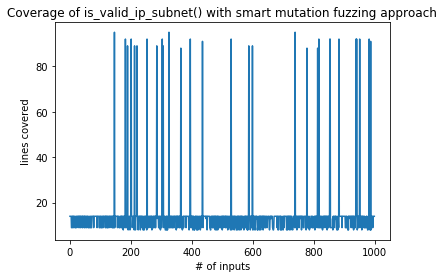

In [19]:
# Plot for pure random approach

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(cumulative_coverage)
plt.title('Coverage of is_valid_ip_subnet() with smart mutation fuzzing approach')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')


# Credit Card Validator

In [240]:
# luhn algorithm


class CreditCard:
    def __init__(self, card_no):
        self.card_no = card_no

    @property
    def company(self):
        comp = ""
        if str(self.card_no).startswith('4'):
            comp = 'Visa Card'
        elif str(self.card_no).startswith(('50', '67', '58', '63',)):
            comp = 'Maestro Card'
        elif str(self.card_no).startswith('5'):
            comp = 'Master Card'
        elif str(self.card_no).startswith('37'):
            comp = 'American Express Card'
        elif str(self.card_no).startswith('62'):
            comp = 'Unionpay Card'
        elif str(self.card_no).startswith('6'):
            comp = 'Discover Card'
        elif str(self.card_no).startswith('35'):
            comp = 'JCB Card'
        elif str(self.card_no).startswith('7'):
            comp = 'Gasoline Card'
        return comp

    def first_check(self):
        card_number= [int(i) for i in str(self.card_no)]     # added this line of code to handle len(int) exception
        #if 13 <= len(self.card_no) <= 19:
        if 13 <= len(card_number) <= 19:
            message = "First check : Valid in terms of length."

        else:
            message = "First check : Check Card number once again it must be of 13 or 16 digits long."
        return message

    def validate(self):
        # double every second digit from right to left
        sum_ = 0
        card_number= [int(i) for i in str(self.card_no)]
        #crd_no = self.card_no[::-1]
        crd_no = card_number[::-1]
        for i in range(len(crd_no)):
            if i % 2 == 1:
                double_it = int(crd_no[i]) * 2

                if len(str(double_it)) == 2:
                    sum_ += sum([eval(i) for i in str(double_it)])

                else:
                    sum_ += double_it

            else:
                sum_ += int(crd_no[i])

        if sum_ % 10 == 0:
            response = "Valid Card"
        else:
            response = 'Invalid Card'

        return response

    @property
    def checksum(self):
        card_number= [int(i) for i in str(self.card_no)]
        return '#CHECKSUM# : ' + str(card_number[-1])

    @classmethod
    def set_card(cls, card_to_check):
        return cls(card_to_check)


def credit_card_validator(card_number):
    card = CreditCard.set_card(card_number)
    if not card.company:
        return False
    print('Company: ',card.company)
    print('Card : ', card.card_no)
    print(card.first_check())
    print(card.checksum)
    print(card.validate())
    return True


# 79927398713
# 4388576018402626
# 379354508162306


In [241]:
credit_card_validator(379354508162306)

Company:  American Express Card
Card :  379354508162306
First check : Valid in terms of length.
#CHECKSUM# : 6
Valid Card


True

In [242]:
credit_card_validator(1234)

False

### Errors Encountered:

1. The input provided for the credit_card_validator() is 1234 and the first input from random fuzzer, which encounters an exception at line 23 as the input value does not validate true to any condition provided and comp value is None. Hence, the exception is thrown saying that string and none type cannot be concatenated. We modify the program accordingly.

###### Exception not handled for the input 1234 and trace is given below

TypeError                                 Traceback (most recent call last)
<ipython-input-3-b5199e87e50f> in <module>
----> 1 credit_card_validator(1234)

<ipython-input-2-6ba12240553f> in credit_card_validator(card_number)
     71 def credit_card_validator(card_number):
     72     card = CreditCard.set_card(card_number)
---> 73     print(card.company)
     74     print('Card : ', card.card_no)
     75     print(card.first_check())

<ipython-input-2-6ba12240553f> in company(self)
     26             comp = 'Gasoline Card'
     27 
---> 28         return 'Company : ' + comp
     29 
     30     def first_check(self):

TypeError: can only concatenate str (not "NoneType") to str

------------------------------------------------------------------------------------------------------------------------------

2. The input provided for the credit_card_validator() is 79927398713, which encounters an exception at line 32 and 44 because the program is trying to call a method on an int type of a variable. This would work if it would have called len() function on a list type of a variable. We modify the program accordingly

###### Exception not handled for len(int) and trace is given below

TypeError                                 Traceback (most recent call last)
<ipython-input-21-3c8761c89add> in <module>
----> 1 credit_card_validator(79927398713)

<ipython-input-20-d6f2ff88e21e> in credit_card_validator(card_number)
     76     print(card.company)
     77     print('Card : ', card.card_no)
---> 78     print(card.first_check())
     79     print(card.checksum)
     80     print(card.validate())

<ipython-input-20-d6f2ff88e21e> in first_check(self)
     30     def first_check(self):
     31         #card_number= [int(i) for i in str(self.card_no)]
---> 32         if 13 <= len(self.card_no) <= 19:
     33             message = "First check : Valid in terms of length."
     34 

TypeError: object of type 'int' has no len()

-----------------------------------------------------------------------------------------------------------------------------

3. The input provided for the credit_card_validator() is 79927398713, which encounters an exception at line 68 as the program tries to subscript a list and not an integer. We modify the program accordingly. 

###### Exception not handled for 'int' object is not subscriptable

TypeError                                 Traceback (most recent call last)
<ipython-input-28-3c8761c89add> in <module>
----> 1 credit_card_validator(79927398713)

<ipython-input-27-b93e4421e5cc> in credit_card_validator(card_number)
     78     print('Card : ', card.card_no)
     79     print(card.first_check())
---> 80     print(card.checksum)
     81     print(card.validate())
     82 

<ipython-input-27-b93e4421e5cc> in checksum(self)
     66     def checksum(self):
     67         #card_number= [int(i) for i in str(self.card_no)]
---> 68         return '#CHECKSUM# : ' + str(self.card_no[-1])
     69 
     70     @classmethod

TypeError: 'int' object is not subscriptable


TypeError                                 Traceback (most recent call last)
<ipython-input-32-3c8761c89add> in <module>
----> 1 credit_card_validator(79927398713)

<ipython-input-31-468b39fc569f> in credit_card_validator(card_number)
     79     print(card.first_check())
     80     print(card.checksum)
---> 81     print(card.validate())
     82 
     83 # 79927398713

<ipython-input-31-468b39fc569f> in validate(self)
     42         sum_ = 0
     43       #  card_number= [int(i) for i in str(self.card_no)]
---> 44         crd_no = self.card_no[::-1]
     45         for i in range(len(crd_no)):
     46             if i % 2 == 1:

TypeError: 'int' object is not subscriptable


## Random Fuzzer for Credit Card Validator

## Concept

+ 
    
## Random Fuzzer Approach 1

+ 


In [249]:
#1 Pure Randomly fuzzing Approach for Credit Card Number

# generate random value in the range of 0 to 1000000000000000

def pure_random_credit_card_fuzz(int_start=0, int_range=100000000000000000000):
    credit_card=""
    credit_card=str(random.randint(int_start, int_range))    
    return credit_card


In [250]:
pure_random_credit_card_fuzz()

'5621475016384050833'

In [251]:
valid_inputs = []
trials = 1000

for i in range(trials):
    input_credit_card_number = pure_random_credit_card_fuzz()
    print ("Input Credit Card Number is " + input_credit_card_number)
    if credit_card_validator(input_credit_card_number):
        valid_inputs.append(input_credit_card_number) 

print(valid_inputs)
len(valid_inputs) / trials

Input Credit Card Number is 51436658143785546782
Company:  Master Card
Card :  51436658143785546782
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 2
Invalid Card
Input Credit Card Number is 63580554278589507017
Company:  Maestro Card
Card :  63580554278589507017
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 7
Invalid Card
Input Credit Card Number is 5612320609958629008
Company:  Master Card
Card :  5612320609958629008
First check : Valid in terms of length.
#CHECKSUM# : 8
Invalid Card
Input Credit Card Number is 21407231397624726421
Input Credit Card Number is 40214053612853672746
Company:  Visa Card
Card :  40214053612853672746
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 6
Valid Card
Input Credit Card Number is 15795076775131732359
Input Credit Card Number is 42848784720080319697
Company:  Visa Card
Card :  42848784720080319697
First check : Check 

Invalid Card
Input Credit Card Number is 22828012100003250675
Input Credit Card Number is 68296882007310634544
Company:  Discover Card
Card :  68296882007310634544
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 4
Invalid Card
Input Credit Card Number is 3275228207412862836
Input Credit Card Number is 57335306239603442989
Company:  Master Card
Card :  57335306239603442989
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 9
Invalid Card
Input Credit Card Number is 42820227573230448128
Company:  Visa Card
Card :  42820227573230448128
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 8
Invalid Card
Input Credit Card Number is 73887661185346736694
Company:  Gasoline Card
Card :  73887661185346736694
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 4
Invalid Card
Input Credit Card Number is 68449735801166207987
Company:  D

Company:  Visa Card
Card :  49077434759478556879
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 9
Valid Card
Input Credit Card Number is 30089810588948923722
Input Credit Card Number is 33075251652624954587
Input Credit Card Number is 80734407983091131049
Input Credit Card Number is 52635275921334017827
Company:  Master Card
Card :  52635275921334017827
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 7
Invalid Card
Input Credit Card Number is 49056392461005579144
Company:  Visa Card
Card :  49056392461005579144
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 4
Valid Card
Input Credit Card Number is 45668457538277494547
Company:  Visa Card
Card :  45668457538277494547
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 7
Invalid Card
Input Credit Card Number is 80377166322241680491
Input Credit Card Number is 2492999

Company:  Gasoline Card
Card :  71307052232735860412
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 2
Valid Card
Input Credit Card Number is 85912489787022366806
Input Credit Card Number is 63673969447336913735
Company:  Maestro Card
Card :  63673969447336913735
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 5
Invalid Card
Input Credit Card Number is 17726327045232041971
Input Credit Card Number is 48608714782476689382
Company:  Visa Card
Card :  48608714782476689382
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 2
Invalid Card
Input Credit Card Number is 48088467384441130356
Company:  Visa Card
Card :  48088467384441130356
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 97772183679392743577
Input Credit Card Number is 72490963821744723697
Company:  Gasoline Card
Card

#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 22372131488434227188
Input Credit Card Number is 55002765079886817151
Company:  Master Card
Card :  55002765079886817151
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 1
Invalid Card
Input Credit Card Number is 434699121833419280
Company:  Visa Card
Card :  434699121833419280
First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 88528936672231935988
Input Credit Card Number is 67758483593337809136
Company:  Maestro Card
Card :  67758483593337809136
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 77318106074869804843
Company:  Gasoline Card
Card :  77318106074869804843
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 3
Invalid Card
Input Credit Card Number is 68777294201014624054
Company:  Discover Card
Card :  6877729

First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 2
Invalid Card
Input Credit Card Number is 30415540286099869613
Input Credit Card Number is 20736708006442073486
Input Credit Card Number is 1628323481652223136
Input Credit Card Number is 14348327501948562917
Input Credit Card Number is 94736447267122640557
Input Credit Card Number is 88308951563976445078
Input Credit Card Number is 38252111732257298269
Input Credit Card Number is 39941612345286400144
Input Credit Card Number is 78702136089948489482
Company:  Gasoline Card
Card :  78702136089948489482
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 2
Invalid Card
Input Credit Card Number is 68973902942050016306
Company:  Discover Card
Card :  68973902942050016306
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 15437513005873766714
Input Credit Card Number is 2969159

0.497

## Mutation Fuzzer for Credit Card Validator

In [255]:
class Credit_Card_Fuzzer:
    def add(s):
        #choose a random position
        pos= random.randint(0,len(s)-1)
        random_integer = str(random.randrange(0, 10)) # changed the char to integer from 0 to 255
        s=s[:pos] + random_integer + s[pos:]
        return int(s)
    
    def remove(s):
        #choose a random position
        pos= random.randint(0,len(s)-1)
        # remove value at pos
        s=s[:pos] + s[pos+1:]
        return s
    
    def flip(s):
        #convert to binary
        binary='{0:08b}'.format(int(s))
        #flip a random bit
        pos=random.randint(0,len(binary)-1)
        flipped_bit=str(1- int(binary[pos]))
        binary=binary[:pos] + flipped_bit + binary[pos + 1:]
        s= int(binary,2)
        return s
        
    def fuzz_credit_card(s):
        mutators = [Credit_Card_Fuzzer.add, Credit_Card_Fuzzer.remove, Credit_Card_Fuzzer.flip]
        mutator = mutators[random.randint(0, 2)]
        return mutator(s)

In [259]:
valid_inputs = []
trials = 1000

for i in range(trials):
    input_credit_card_number = Credit_Card_Fuzzer.fuzz_credit_card("4388576018402626")
    print("Input Credit Card Number is "+str(input_credit_card_number)+ "\n")
    if credit_card_validator(input_credit_card_number):
        valid_inputs.append(input_credit_card_number) 

print(valid_inputs)
len(valid_inputs) / trials

Input Credit Card Number is 4458944762580290

Company:  Visa Card
Card :  4458944762580290
First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 43885760181402626

Company:  Visa Card
Card :  43885760181402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438857601802626

Company:  Visa Card
Card :  438857601802626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4458944762580290

Company:  Visa Card
Card :  4458944762580290
First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 4388575481531714

Company:  Visa Card
Card :  4388575481531714
First check : Valid in terms of length.
#CHECKSUM# : 4
Invalid Card
Input Credit Card Number is 438857601840262

Company:  Visa Card
Card :  438857601840262
First check : Valid in terms of length.
#CHECKSUM# : 2
Valid Card
Input Credit Card Number is 438576018402626

Compa

Company:  Visa Card
Card :  4388576018402658
First check : Valid in terms of length.
#CHECKSUM# : 8
Invalid Card
Input Credit Card Number is 4388576018402627

Company:  Visa Card
Card :  4388576018402627
First check : Valid in terms of length.
#CHECKSUM# : 7
Invalid Card
Input Credit Card Number is 4388576085511490

Company:  Visa Card
Card :  4388576085511490
First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 438876018402626

Company:  Visa Card
Card :  438876018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43885760198402626

Company:  Visa Card
Card :  43885760198402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4388593198271810

Company:  Visa Card
Card :  4388593198271810
First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 438856018402626

Company:  Visa Card
Card :  438856018402626
Fir


Company:  Visa Card
Card :  43885760184702626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4388576018402562

Company:  Visa Card
Card :  4388576018402562
First check : Valid in terms of length.
#CHECKSUM# : 2
Invalid Card
Input Credit Card Number is 4423760390491458

Company:  Visa Card
Card :  4423760390491458
First check : Valid in terms of length.
#CHECKSUM# : 8
Invalid Card
Input Credit Card Number is 438857608402626

Company:  Visa Card
Card :  438857608402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43885476018402626

Company:  Visa Card
Card :  43885476018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438576018402626

Company:  Visa Card
Card :  438576018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4388576018403138

Company:  Visa Card
Card :  4388576018403138
F

Company:  Visa Card
Card :  43885760118402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Valid Card
Input Credit Card Number is 44388576018402626

Company:  Visa Card
Card :  44388576018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438857018402626

Company:  Visa Card
Card :  438857018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43885760118402626

Company:  Visa Card
Card :  43885760118402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Valid Card
Input Credit Card Number is 43588576018402626

Company:  Visa Card
Card :  43588576018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43885760178402626

Company:  Visa Card
Card :  43885760178402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438576018402626

Company:  Visa Card
Card :  438576018402626


Company:  Visa Card
Card :  4388575749967170
First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 43885760184072626

Company:  Visa Card
Card :  43885760184072626
First check : Valid in terms of length.
#CHECKSUM# : 6
Valid Card
Input Credit Card Number is 4388576018402754

Company:  Visa Card
Card :  4388576018402754
First check : Valid in terms of length.
#CHECKSUM# : 4
Invalid Card
Input Credit Card Number is 4388576018402624

Company:  Visa Card
Card :  4388576018402624
First check : Valid in terms of length.
#CHECKSUM# : 4
Invalid Card
Input Credit Card Number is 43885760184002626

Company:  Visa Card
Card :  43885760184002626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43878576018402626

Company:  Visa Card
Card :  43878576018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Valid Card
Input Credit Card Number is 4384177971891522

Company:  Visa Card
Card :  4384177971891522

First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43885760148402626

Company:  Visa Card
Card :  43885760148402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438857608402626

Company:  Visa Card
Card :  438857608402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4388576018419010

Company:  Visa Card
Card :  4388576018419010
First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 438857618402626

Company:  Visa Card
Card :  438857618402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4247838530047298

Company:  Visa Card
Card :  4247838530047298
First check : Valid in terms of length.
#CHECKSUM# : 8
Invalid Card
Input Credit Card Number is 438576018402626

Company:  Visa Card
Card :  438576018402626
First check : Valid in terms of length.
#CHECKSUM#

Card :  43885760184902626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438857601840262

Company:  Visa Card
Card :  438857601840262
First check : Valid in terms of length.
#CHECKSUM# : 2
Valid Card
Input Credit Card Number is 388576018402626

Input Credit Card Number is 438857018402626

Company:  Visa Card
Card :  438857018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438876018402626

Company:  Visa Card
Card :  438876018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4388593198271810

Company:  Visa Card
Card :  4388593198271810
First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 4389125774216514

Company:  Visa Card
Card :  4389125774216514
First check : Valid in terms of length.
#CHECKSUM# : 4
Invalid Card
Input Credit Card Number is 4388575984848194

Company:  Visa Card
Card :  

Company:  Visa Card
Card :  43887576018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438857601840626

Company:  Visa Card
Card :  438857601840626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438857608402626

Company:  Visa Card
Card :  438857608402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43885760418402626

Company:  Visa Card
Card :  43885760418402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4388576018533698

Company:  Visa Card
Card :  4388576018533698
First check : Valid in terms of length.
#CHECKSUM# : 8
Valid Card
Input Credit Card Number is 438576018402626

Company:  Visa Card
Card :  438576018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43868576018402626

Company:  Visa Card
Card :  43868576018402626
Firs

Company:  Visa Card
Card :  438576018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438857018402626

Company:  Visa Card
Card :  438857018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438857601840226

Company:  Visa Card
Card :  438857601840226
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43885760184026256

Company:  Visa Card
Card :  43885760184026256
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 488576018402626

Company:  Visa Card
Card :  488576018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4386376995147074

Company:  Visa Card
Card :  4386376995147074
First check : Valid in terms of length.
#CHECKSUM# : 4
Invalid Card
Input Credit Card Number is 438857018402626

Company:  Visa Card
Card :  438857018402626
First ch

Card :  4388576018401602
First check : Valid in terms of length.
#CHECKSUM# : 2
Invalid Card
Input Credit Card Number is 4388576085511490

Company:  Visa Card
Card :  4388576085511490
First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 4388610378140994

Company:  Visa Card
Card :  4388610378140994
First check : Valid in terms of length.
#CHECKSUM# : 4
Invalid Card
Input Credit Card Number is 438576018402626

Company:  Visa Card
Card :  438576018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438857601802626

Company:  Visa Card
Card :  438857601802626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43885760168402626

Company:  Visa Card
Card :  43885760168402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4370983832358210

Company:  Visa Card
Card :  4370983832358210
First check : Valid in 

First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 40388576018402626

Company:  Visa Card
Card :  40388576018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438857601402626

Company:  Visa Card
Card :  438857601402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Valid Card
Input Credit Card Number is 43885760218402626

Company:  Visa Card
Card :  43885760218402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43885761018402626

Company:  Visa Card
Card :  43885761018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4388576016305474

Company:  Visa Card
Card :  4388576016305474
First check : Valid in terms of length.
#CHECKSUM# : 4
Invalid Card
Input Credit Card Number is 438857601840266

Company:  Visa Card
Card :  438857601840266
First check : Valid in terms of length.
#CHECK

0.951

In [260]:
from fuzzingbook.Coverage import Coverage

input_credit_card_number = Credit_Card_Fuzzer.fuzz_credit_card("4388576018402626")

with Coverage() as cov:
    credit_card_validator(input_credit_card_number)
    
[c for c in cov.coverage()]

[('company', 21),
 ('company', 15),
 ('company', 27),
 ('company', 13),
 ('company', 10),
 ('company', 25),
 ('company', 19),
 ('__init__', 6),
 ('company', 17),
 ('credit_card_validator', 76),
 ('company', 11),
 ('company', 23),
 ('credit_card_validator', 77),
 ('set_card', 72),
 ('credit_card_validator', 78),
 ('__exit__', 237)]

In [261]:
def calculate_cumulative_coverage_1_input(input_population, function):
    cumulative_coverage = []
    all_coverage = set()
    
    for inp in input_population:
        with Coverage() as cov:
            try:
                function(inp)
            except:
                # we ignore exceptions for the purpose of this code, but some exceptions may be interesting
                pass
        # set union
        all_coverage |= cov.coverage()
        cumulative_coverage.append(len(all_coverage))
    return cumulative_coverage

In [263]:
def calculate_coverage_1_input(input_population, function):
    all_coverage = set()
    with Coverage() as cov:
        try:
            function(input_population)
        except:
            # we ignore exceptions for the purpose of this code, but some exceptions may be interesting
            pass
        # set union
    all_coverage |= cov.coverage()
    return len(all_coverage)

In [271]:
seed = {"43885760184026264"}
calculate_coverage_1_input(seed, credit_card_validator)

16

In [281]:
trials = 1000

#[{'input':{'ip':'','subnet':''},'coverage':''}
cumulative_coverage = []
seed = {"43885760184026264"}
population= []
max_coverage=0
for i in range(0, trials):
    coverage=calculate_coverage_1_input(seed, credit_card_validator)
    #print(seed)
    cumulative_coverage.append(coverage)
    if coverage>max_coverage:
        population.append({'input':seed, 'coverage':coverage})
        max_coverage=coverage
    #check if population is not empty 
    if population:
        #select seed semi randomly- sort and if equal coverage, then select random
        population= sorted(population, key = lambda i: i['coverage'], reverse=True)
        #get all seeds from population with highest coverage
        high_coverage_seeds=population[0]
        if len(population)>1 : 
            new_pop=[d for d in population if d['coverage']==high_coverage_seeds['coverage']]
            #choose random from dic and add to seed
            rand_pop=random.randint(0, len(new_pop) - 1)
            y=''.join(new_pop[rand_pop]['input'])
            seed={Credit_Card_Fuzzer.fuzz_credit_card(str(new_pop[rand_pop]['input']))} 
        else:
            y=''.join(population[0]['input'])
            seed={Credit_Card_Fuzzer.fuzz_credit_card(str(y))} 
print(population)
cumulative_coverage

TypeError: object of type 'int' has no len()

# RSA algorithm

In [ ]:

import random
max_PrimLength = 1000000000000

'''
calculates the modular inverse from e and phi
'''
def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)

'''
calculates the gcd of two ints
'''
def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

'''
checks if a number is a prime
'''
def is_prime(num):
    if num == 2:
        return True
    if num < 2 or num % 2 == 0:
        return False
    for n in range(3, int(num**0.5)+2, 2):
        if num % n == 0:
            return False
    return True

def generateRandomPrim():
    while(1):
        ranPrime = random.randint(0,max_PrimLength)
        if is_prime(ranPrime):
            return ranPrime

def generate_keyPairs():
    p = generateRandomPrim()
    q = generateRandomPrim()
    
    n = p*q
    print("n ",n)
    '''phi(n) = phi(p)*phi(q)'''
    phi = (p-1) * (q-1) 
    print("phi ",phi)
    
    '''choose e coprime to n and 1 > e > phi'''    
    e = random.randint(1, phi)
    g = gcd(e,phi)
    while g != 1:
        e = random.randint(1, phi)
        g = gcd(e, phi)
        
    print("e=",e," ","phi=",phi)
    '''d[1] = modular inverse of e and phi'''
    d = egcd(e, phi)[1]
    
    '''make sure d is positive'''
    d = d % phi
    if(d < 0):
        d += phi
        
    return ((e,n),(d,n))
        
def decrypt(ctext,private_key):
    try:
        key,n = private_key
        text = [chr(pow(char,key,n)) for char in ctext]
        return "".join(text)
    except TypeError as e:
        print(e)

def encrypt(text,public_key):
    key,n = public_key
    ctext = [pow(ord(char),key,n) for char in text]
    return ctext

if __name__ == '__main__':
    public_key,private_key = generate_keyPairs() 
    print("Public: ",public_key)
    print("Private: ",private_key)
    
    ctext = encrypt("Heya",public_key)
    print("encrypted  =",ctext)
    plaintext = decrypt(ctext, private_key)
    print("decrypted =",plaintext)